In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
df = sns.load_dataset("titanic")

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
df.shape

(891, 15)

In [43]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [45]:
df.drop("deck",axis=1,inplace=True)

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [47]:
df['age'] = df['age'].fillna(df['age'].mean())

In [48]:
df.dropna(inplace=True)

In [49]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [50]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [51]:
categorical = df.select_dtypes(include=["category","object"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print(f"Caterogical: {categorical}")
print(f"Numerical: {numerical}")

Caterogical: Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')
Numerical: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


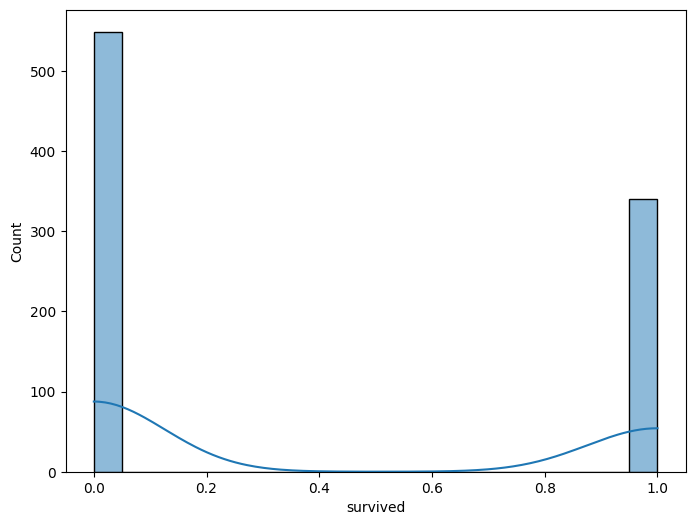

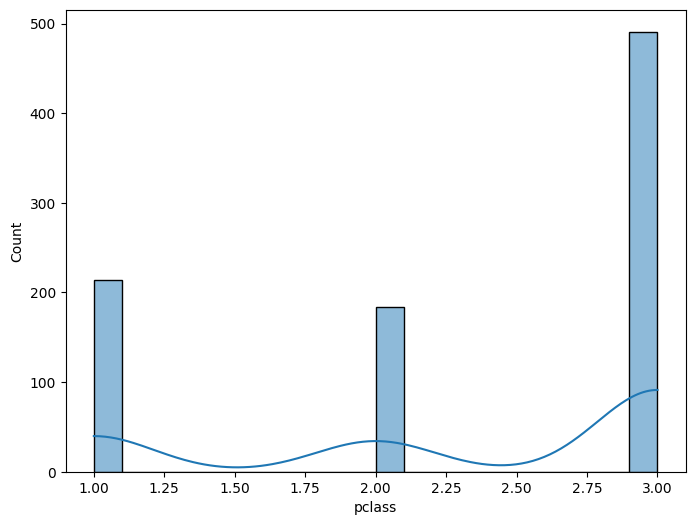

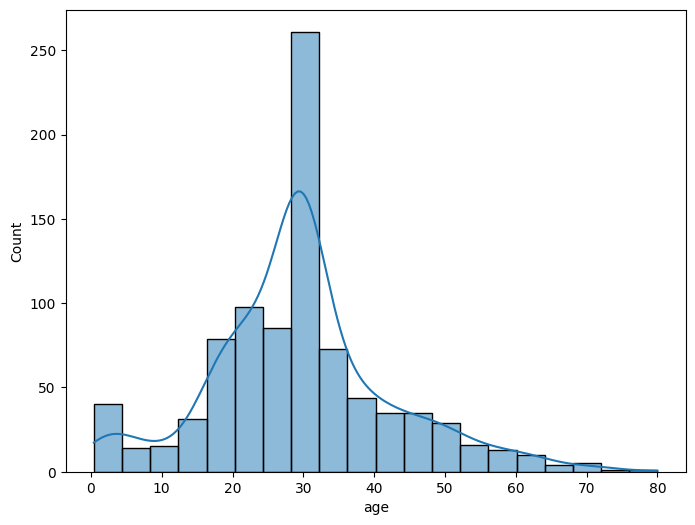

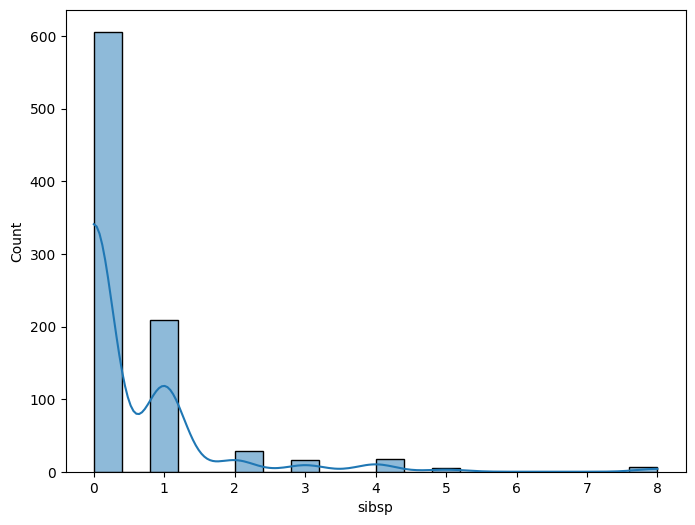

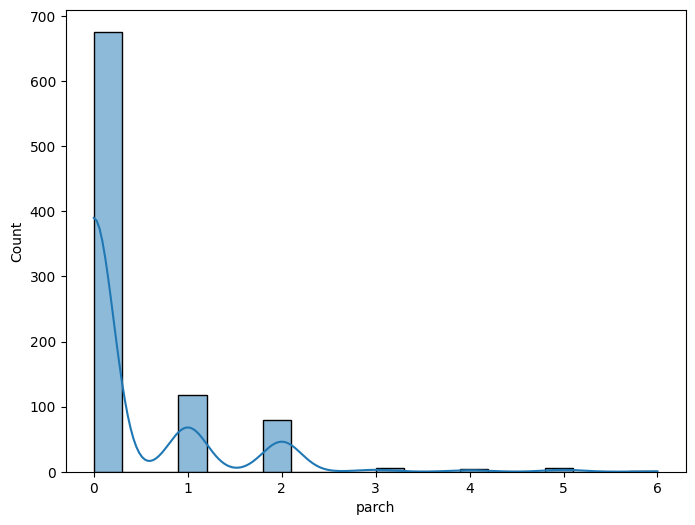

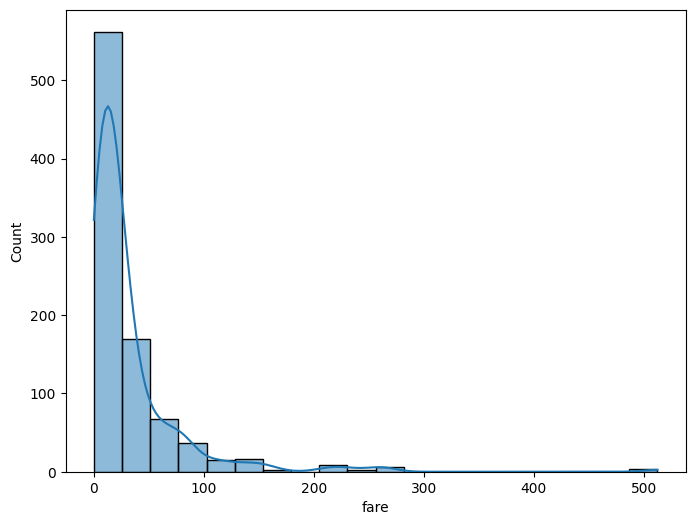

In [52]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],bins=20,kde=True)

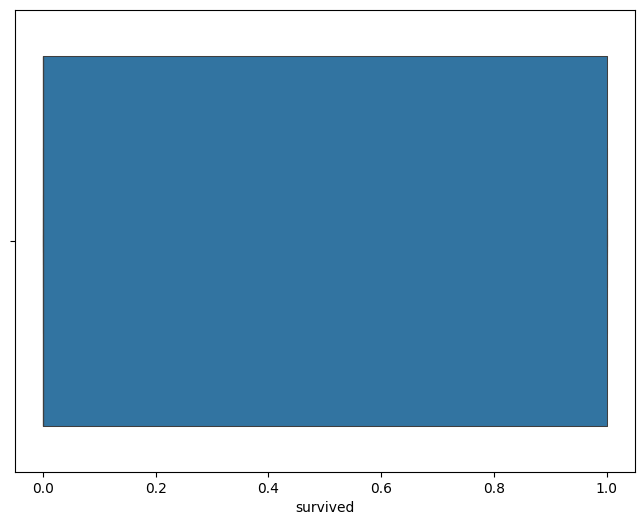

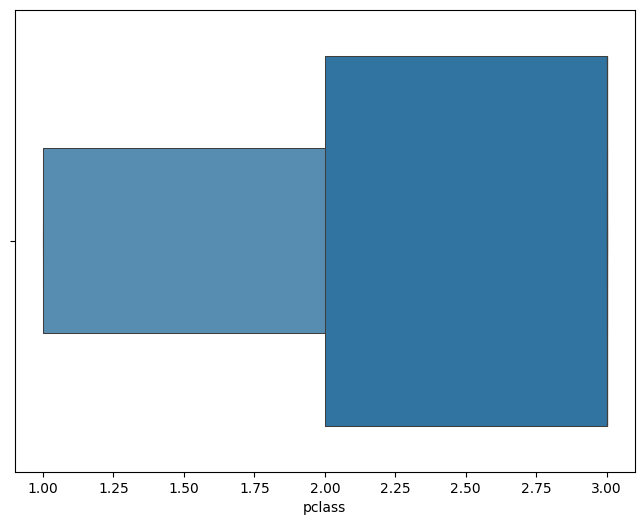

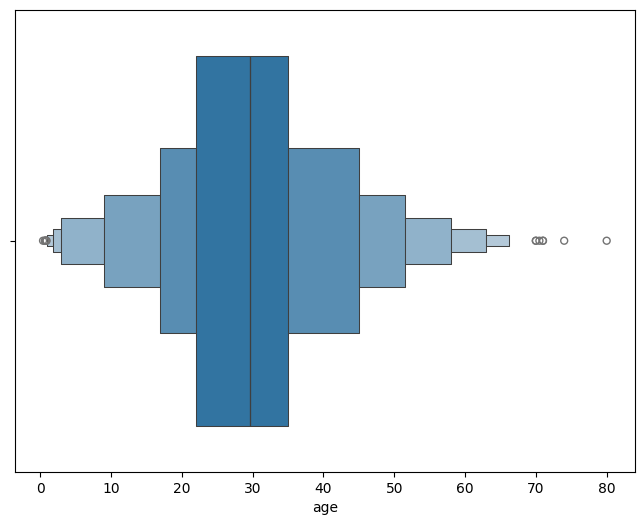

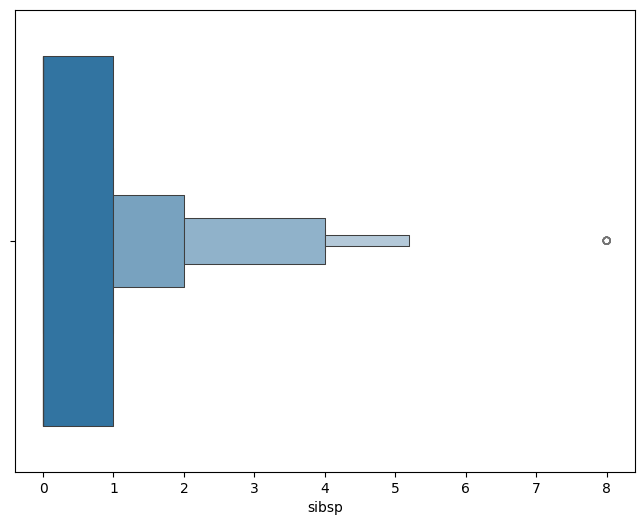

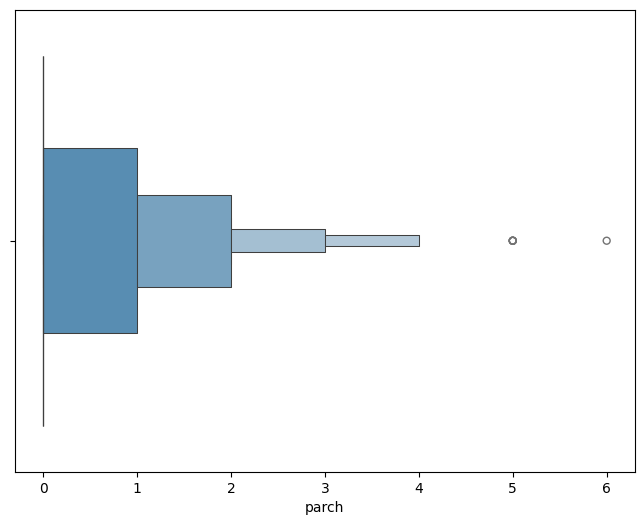

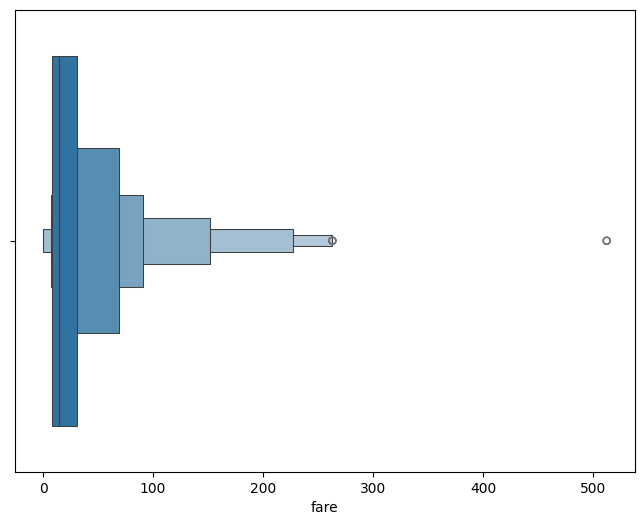

In [53]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(data=df,x=df[col])

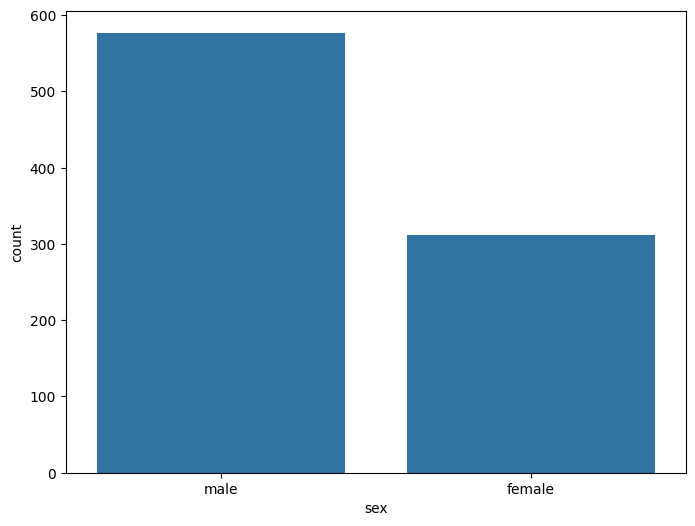

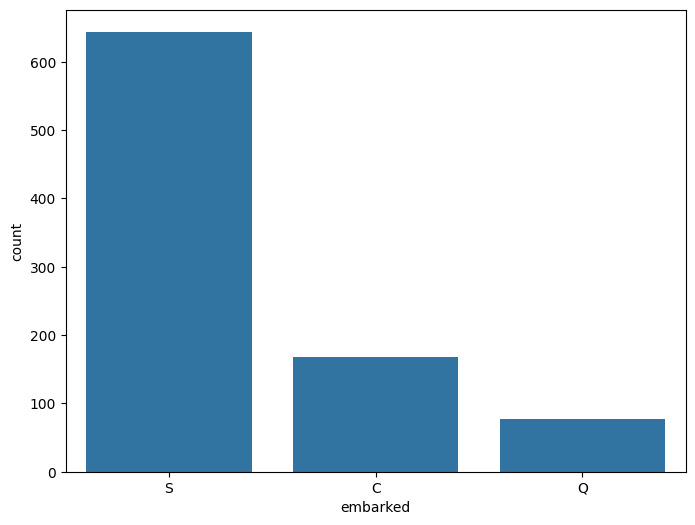

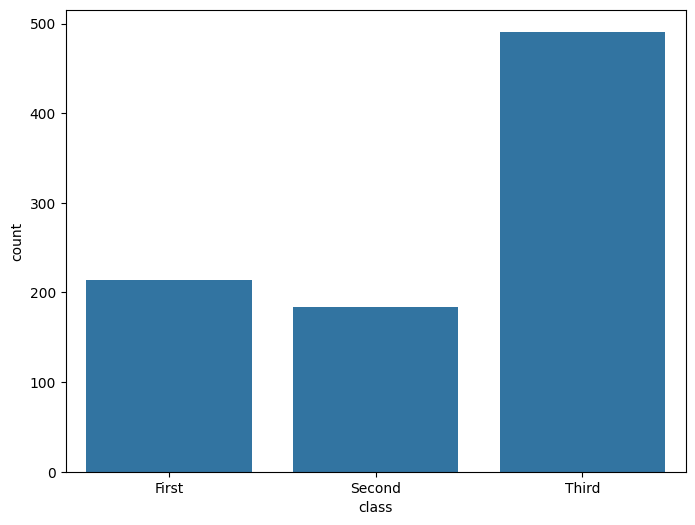

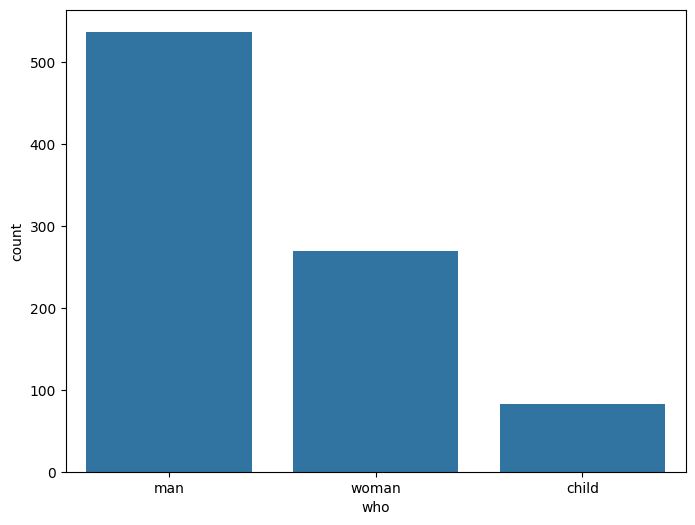

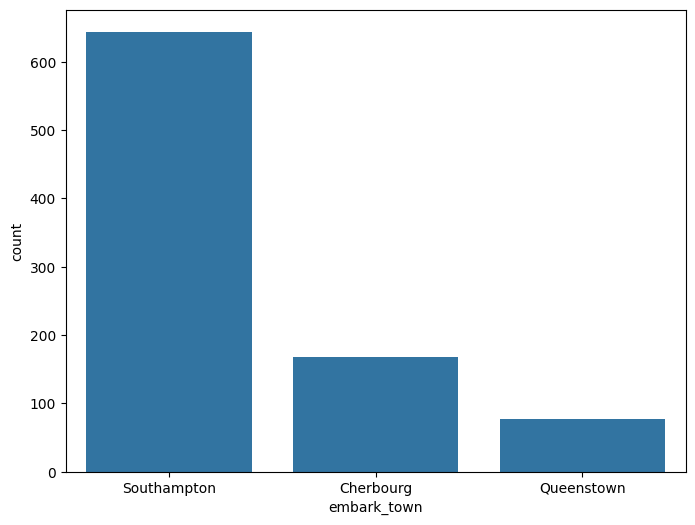

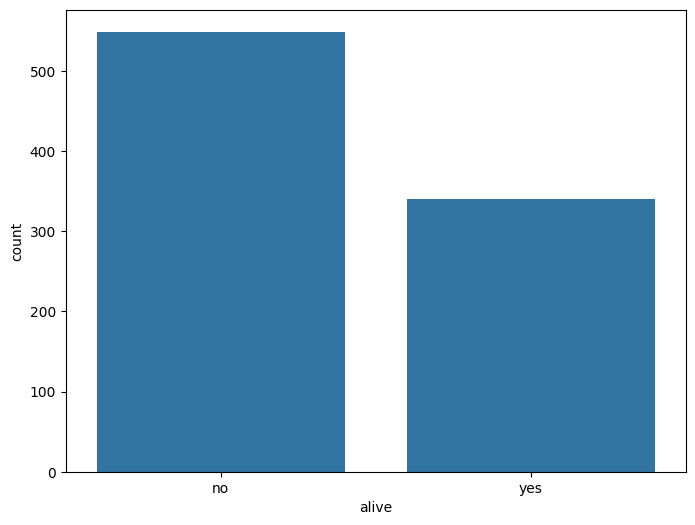

In [54]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(df,x = df[col])

<Axes: >

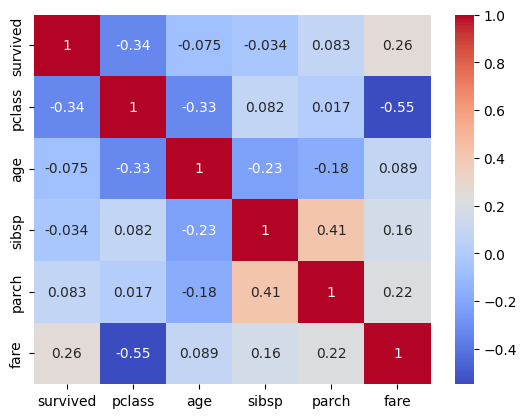

In [55]:
numerical_df = df[numerical]
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

In [56]:
label_en = [col for col in categorical if df[col].nunique() == 2]
hot_en = [col for col in categorical if df[col].nunique() > 2]
hot_en

['embarked', 'class', 'who', 'embark_town']

In [65]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [58]:
le = LabelEncoder()

In [59]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,0,True


In [61]:
df = pd.get_dummies(df,columns=hot_en)

In [62]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,...,True,False,False,True,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,...,False,True,False,False,False,False,True,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,...,True,False,False,True,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,...,True,True,False,False,False,False,True,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,...,True,False,False,True,False,True,False,False,False,True


In [63]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
scaler = StandardScaler()

In [67]:
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [68]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,...,True,False,False,True,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,...,False,True,False,False,False,False,True,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,...,True,False,False,True,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,...,True,True,False,False,False,False,True,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,...,True,False,False,True,False,True,False,False,False,True


In [69]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = rf.predict(X_test)

In [71]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 1.0


In [72]:
importances = rf.feature_importances_
features = X.columns

In [73]:
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
print(feat_df.sort_values(by="Importance", ascending=False))

                    Feature  Importance
7                     alive    0.626106
6                adult_male    0.067016
1                       sex    0.056319
16                  who_man    0.046100
5                      fare    0.040902
2                       age    0.031749
17                who_woman    0.026153
0                    pclass    0.022390
14              class_Third    0.022355
3                     sibsp    0.015354
12              class_First    0.009263
4                     parch    0.008555
8                     alone    0.004664
13             class_Second    0.004013
15                who_child    0.003832
9                embarked_C    0.003068
20  embark_town_Southampton    0.002970
18    embark_town_Cherbourg    0.002895
11               embarked_S    0.002888
19   embark_town_Queenstown    0.002186
10               embarked_Q    0.001223


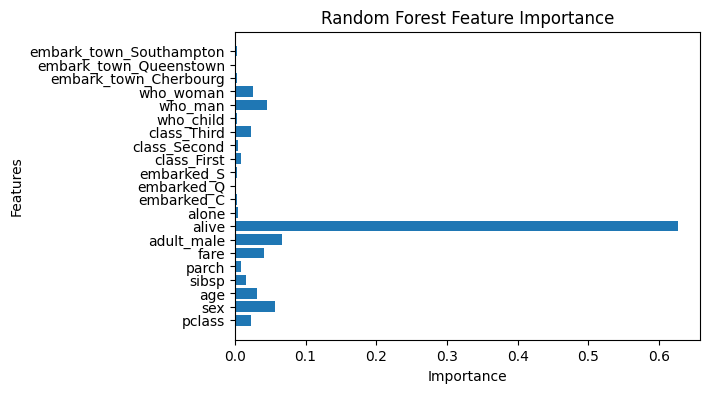

In [74]:
plt.figure(figsize=(6,4))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()